# Chatbook LLM cells

Anton Antonov   
["Jupyter::Chatbook" Raku package at GitHub](https://github.com/antononcube/Raku-Jupyter-Chatbook)   
August 2023

------

## Introduction

In this notebook we show how the Large Language Models (LLMs) of OpenAI (ChatGPT) and Google (PaLM) can be interacted with using notebook cells.

**Remark:** The chatbook LLM cells use the packages ["WWW::OpenAI"](https://raku.land/zef:antononcube/WWW::OpenAI), [AAp2], and ["WWW::PaLM"](https://raku.land/zef:antononcube/WWW::PaLM), [AAp3].

**Remark:** The API keys for the LLM cells are taken from the Operating System (OS) environmental variables `OPENAI_API_KEY` and `PALM_API_KEY`.


**Remark:** The results of the LLM cells are automatically copied to the clipboard. (Currently enabled on macOS only.)



-----

## OpenAI

In this section we show examples of accessing OpenAI's text completion using both normal code cells and dedicated OpenAI cells.

Here is an example programmatic ("manual") access:

In [1]:
use WWW::OpenAI;

openai-completion('How many people live in EU?', max-tokens=> 120, format =>'values')

As of 2021, the estimated population of the European Union (EU) is around 447 million people. However, it is important to note that the population of the EU is subject to change due to factors such as migration, birth rates, and other demographic factors.

Accessing OpenAI "directly" with an LLM cell with the magic spec `%% openai`:

In [2]:
#% openai
Randomly generate 3 dog names and 4 cat names.

Dog names:
1. Tucker
2. Bailey
3. Luna

Cat names:
1. Oliver
2. Bella
3. Milo
4. Chloe

Here we put parameters on cell's magic line, that specify to get `3` results with text generation temperature `0.9`, using the model "gpt-3.5-turbo":

In [3]:
#% openai , n = 3 , temperature = 0.9 , model = 'gpt-3.5-turbo'
Randomly generate 2 dog names.

1. Bella
2. Max
1. Baxter
2. Luna
1. Jasper
2. Luna

**Remark:** For the full list of parameters that can be used in cell's magic line see the signature of `openai-completion` (and documentation) of ["WWW::OpenAI"](https://raku.land/zef:antononcube/WWW::OpenAI), [AAp2].

-------

## PaLM

Programmatic access of PaLM:

In [4]:
use WWW::PaLM;

'Generate a scray story about a little girl going to a forest and getting possesed by another dead girl.' 
==> palm-generate-text(format => 'values')

Once upon a time, there was a little girl named Lily who lived in a small village on the edge of a dark and mysterious forest. Lily was a curious and adventurous girl, and she loved to explore the forest. One day, Lily decided to go for a walk in the forest by herself. She walked for a

Direct PaLM access:

In [5]:
#% palm
Generate a scray story about a little girl going to a forest, eating some strange mushrooms because she starved, and becoming a giant walking tree. 

Once upon a time, there was a little girl named Alice who lived in a small village on the edge of a dark and mysterious forest. Alice was a curious and adventurous girl, and she loved to explore the forest. One day, Alice decided to go for a walk in the forest by herself. She walked for a long time, and as the sun began to set, she realized that she was lost.

Alice was scared. She didn't know what to do. She wandered through the forest, calling for help, but no one could hear her. Finally, she came to a clearing. In the middle of the clearing was a large tree. Alice was about to go around the tree when she heard a voice.

"Hello," the voice said.

Alice looked up, and she saw a large, green face in the leaves of the tree.

"Who are you?" Alice asked.

"I am the tree," the voice said. "And I can help you."

"Help me?" Alice asked. "How?"

"Eat these mushrooms," the tree said. "They will make you big and strong, and you will be able to find your way home."

Alice looked at the mushrooms

Here is an example of an LLM cell with additional parameters in the magic spec line:

In [6]:
%% palm, max-tokens=30, format='json'
Generate a story about talking cars. No longer than 20 words. 

{
  "candidates": [
    {
      "safetyRatings": [
        {
          "category": "HARM_CATEGORY_DEROGATORY",
          "probability": "NEGLIGIBLE"
        },
        {
          "probability": "NEGLIGIBLE",
          "category": "HARM_CATEGORY_TOXICITY"
        },
        {
          "category": "HARM_CATEGORY_VIOLENCE",
          "probability": "NEGLIGIBLE"
        },
        {
          "probability": "NEGLIGIBLE",
          "category": "HARM_CATEGORY_SEXUAL"
        },
        {
          "category": "HARM_CATEGORY_MEDICAL",
          "probability": "NEGLIGIBLE"
        },
        {
          "probability": "NEGLIGIBLE",
          "category": "HARM_CATEGORY_DANGEROUS"
        }
      ],
      "output": "A talking car says, \"I'm tired of being a cab. I want to be a race car!\""
    }
  ]
}

**Remark:** For the full list of parameters that can be used in cell's magic line see the signature of `palm-generate-text` (and documentation) of ["WWW::PaLM"](https://raku.land/zef:antononcube/WWW::PaLM), [AAp3].

-----

##  DALL・E

In this section we demonstrate image generation using DALL・E.

Here is an example of programmatic access:

In [7]:
use WWW::OpenAI;
use Text::Plot;

my @imgResB64 = |openai-create-image(
        "racoon with a sliced onion in the style of Raphael",
        n => 2,
        size => 'small',
        response-format => 'b64_json',
        format => 'values',
        method => 'tiny');

@imgResB64.elems

2


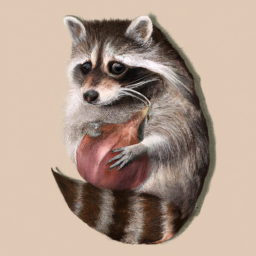
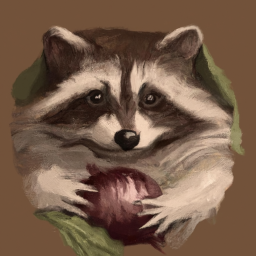

In [8]:
@imgResB64.map({ from-base64($_) }).join("\n\n")

Image generation with a DALL・E cell:


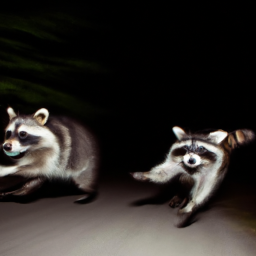

In [9]:
%%dalle, size=small
Raccoons chase in the style of Helmut Newton.

Here we specify the generation of multiple images:


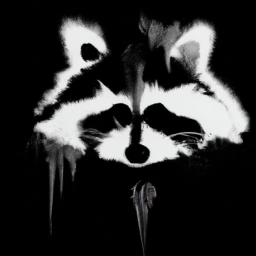
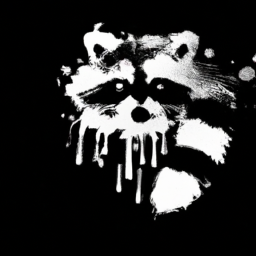
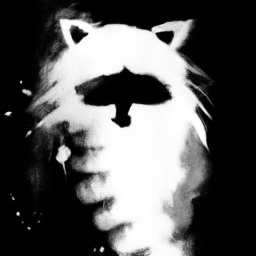
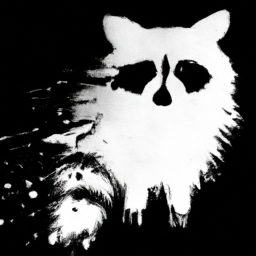
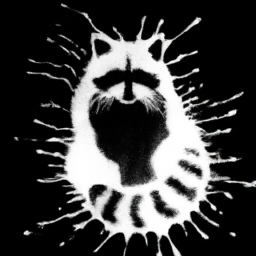

In [10]:
#% dalle, size=small, n=5
Generate raccoon inkblot with white ink on black canvas.

-----

## References

### Articles

[AA1] Anton Antonov,
["Workflows with LLM functions"](https://rakuforprediction.wordpress.com/2023/08/01/workflows-with-llm-functions/),
(2023),
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).


### Packages

[AAp1] Anton Antonov,
[LLM::Functions Raku package](https://github.com/antononcube/Raku-LLM-Functions),
(2023),
[GitHub/antononcube](https://github.com/antononcube).

[AAp2] Anton Antonov,
[WWW::OpenAI Raku package](https://github.com/antononcube/Raku-WWW-OpenAI),
(2023),
[GitHub/antononcube](https://github.com/antononcube).

[AAp3] Anton Antonov,
[WWW::PaLM Raku package](https://github.com/antononcube/Raku-WWW-PaLM),
(2023),
[GitHub/antononcube](https://github.com/antononcube).
